In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_shopping_data.csv")

In [3]:
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [4]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [5]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [7]:
df.shape

(99457, 10)

In [8]:
df.size

994570

In [9]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [10]:
df.duplicated().value_counts()

False    99457
dtype: int64

In [11]:
df.columns

Index(['invoice_no', 'customer_id', 'gender', 'age', 'category', 'quantity',
       'price', 'payment_method', 'invoice_date', 'shopping_mall'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [14]:
df['invoice_date'] = df['invoice_date'].apply(pd.to_datetime)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


In [18]:
df.nunique()

invoice_no        99457
customer_id       99457
gender                2
age                  52
category              8
quantity              5
price                40
payment_method        3
invoice_date        797
shopping_mall        10
dtype: int64

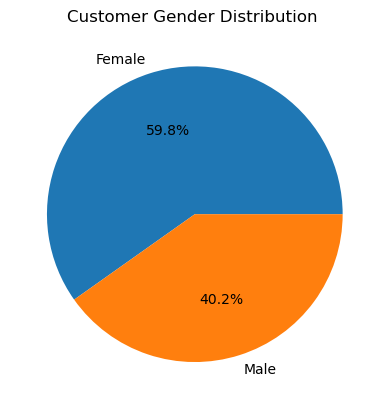

In [22]:
#Calculate the counbt of each gender
gender_count =df['gender'].value_counts()

#Create Pie Chart
fig, ax= plt.subplots()
ax.pie(gender_count, labels =gender_count.index, autopct='%1.1f%%')
ax.set_title("Customer Gender Distribution ")
plt.show()

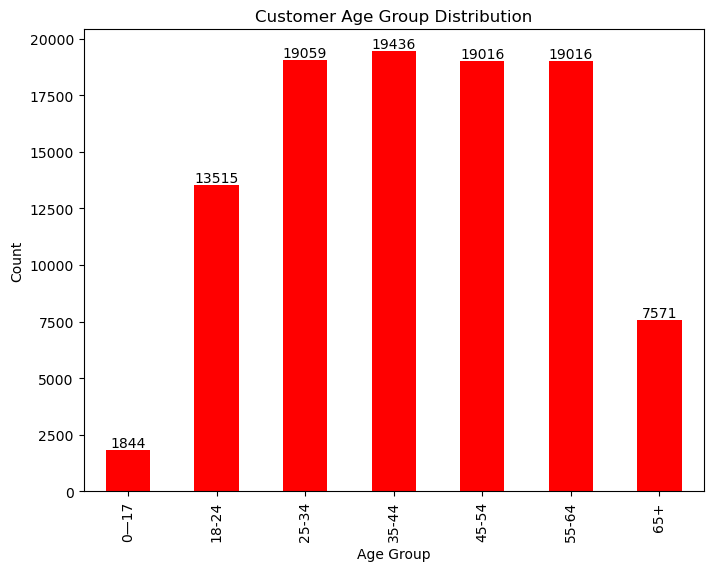

In [34]:
#Define age groups
age_groups = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0—17','18-24','25-34','35-44','45-54','55-64','65+']

#Create age groups based on the age column
df['Age Group'] = pd.cut(df['age'],bins=age_groups, labels =labels)

#Create a Histogram of age groups

fig, ax= plt.subplots(figsize=(8, 6))
df['Age Group'].value_counts().sort_index().plot(kind='bar',color='red',ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel("Count")
ax.set_title('Customer Age Group Distribution')

#Add Labels to histogram bar

for i in ax.containers:
    ax.bar_label(i)
plt.show()

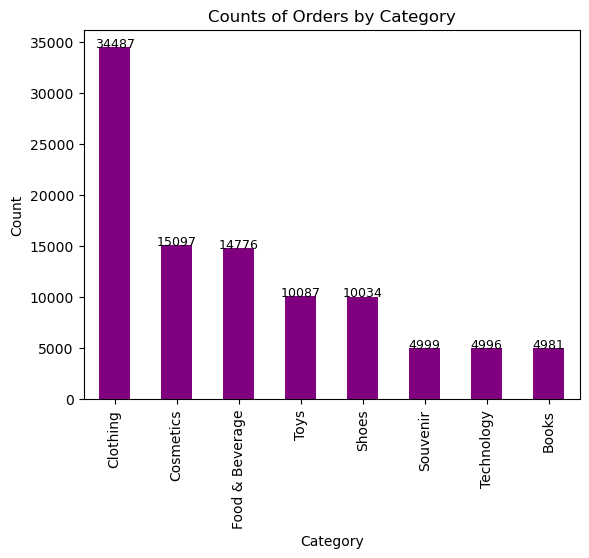

In [35]:
#Create a bar chart to visualize the count of each category 
category_count = df['category'].value_counts()
category_count.plot(kind ='bar', color = 'purple')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Counts of Orders by Category')

#add labels to the bars
for i, count in enumerate(category_count):
    plt.text(i, count+10, str(count), ha = 'center', fontsize = 9)
plt.show()

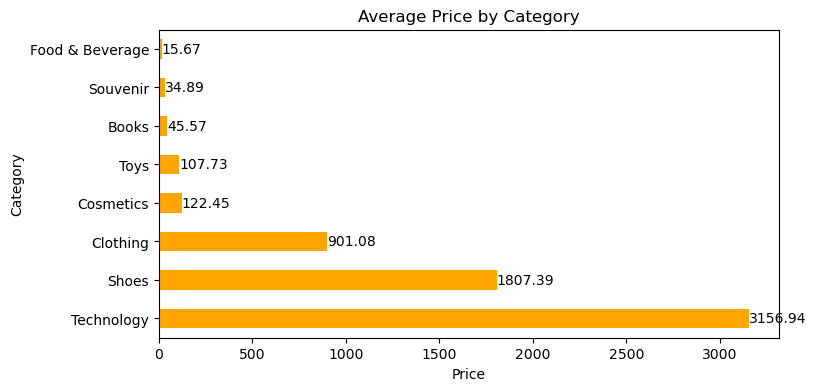

In [37]:
# create a horizontal bar chart to visualize the average quantity for each␣category
category_mean = df.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
category_mean.plot(kind='barh', color='orange')
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Average Price by Category')
# add labels to the bars
for i, mean in enumerate(category_mean):
    plt.text(mean+0.1, i, str(round(mean, 2)), va='center', fontsize=10)

plt.show()

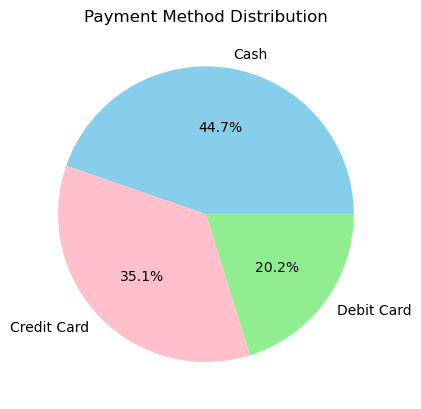

In [38]:
 # Calculate the count of each gender
pay_count = df['payment_method'].value_counts()
# define the colors for each gender
colors = ['skyblue', 'pink', 'lightgreen']
# Create pie chart
fig, ax = plt.subplots()
ax.pie(pay_count, labels=pay_count.index, colors=colors, autopct='%1.1f%%')
ax.set_title('Payment Method Distribution')
plt.show()


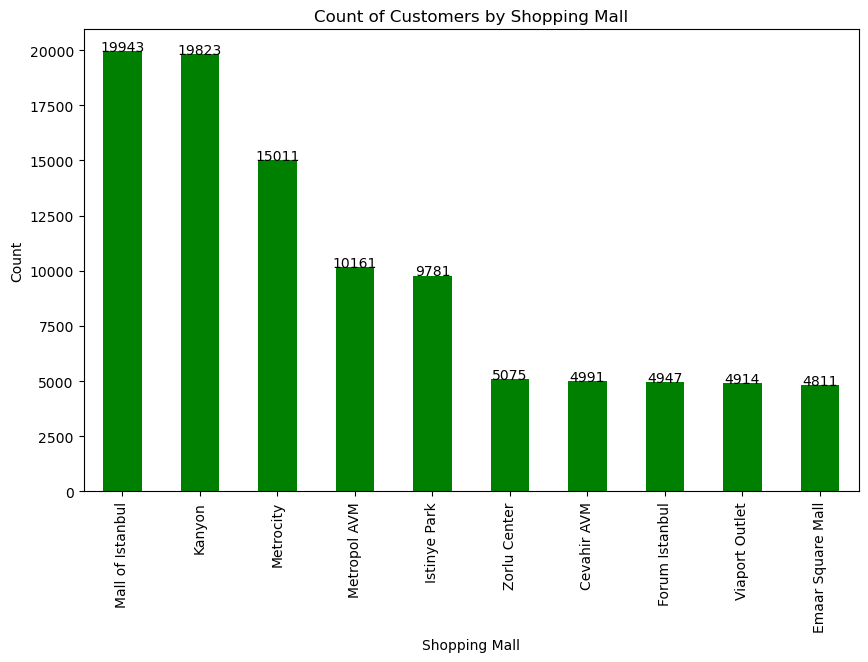

In [40]:
 # get the count of each shopping mall
mall_count = df['shopping_mall'].value_counts()
# create a bar chart to visualize the count of each shopping mall
fig, ax = plt.subplots(figsize=(10, 6))
mall_count.plot(kind='bar', color='green')
plt.xlabel('Shopping Mall')
plt.ylabel('Count')
plt.title('Count of Customers by Shopping Mall')
# add labels to the bars
for i, count in enumerate(mall_count):
    plt.text(i, count+10, str(count), ha='center')

plt.show()


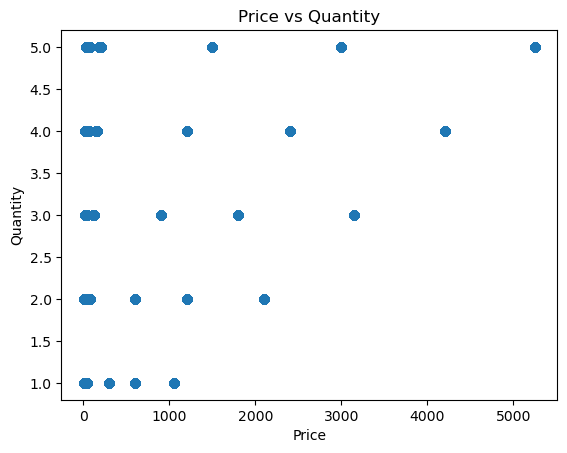

In [41]:
# create a scatter plot to visualize the relationship between price and quantity
plt.scatter(x='price', y='quantity', data=df)
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price vs Quantity')
plt.show()